In [19]:
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import seaborn as sns
import json

In [15]:
# !wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/straight-curly-data/data.zip

In [16]:
# !unzip data.zip

In [20]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [21]:
datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = datagen.flow_from_directory(
    'data/train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',  # For binary classification
    shuffle=True
)

Found 800 images belonging to 2 classes.


In [24]:
test_generator = datagen.flow_from_directory(
    'data/test',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 201 images belonging to 2 classes.


In [25]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

In [26]:
model = Sequential([
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    
    # Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1733482584.362275     395 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:1e.0, compute capability: 7.5


In [27]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.8),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    20,480,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,481,025 (78.13 MB)

 Trainable params: 20,481,025 (78.13 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

/opt/saturncloud/envs/saturn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1733482701.144557    4690 service.cc:148] XLA service 0x7f3798003b30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733482701.144592    4690 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-12-06 10:58:21.164288: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733482701.283301    4690 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-06 10:58:21.552714: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,32,200,200]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,3,200,200]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activa

 3/40 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.5000 - loss: 0.8247

I0000 00:00:1733482702.691724    4690 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5555 - loss: 0.7491

2024-12-06 10:58:27.179221: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,32,200,200]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,3,200,200]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 154ms/step - accuracy: 0.5565 - loss: 0.7477 - val_accuracy: 0.6020 - val_loss: 0.6456
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.6470 - loss: 0.6125 - val_accuracy: 0.6169 - val_loss: 0.6255
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.6530 - loss: 0.6164 - val_accuracy: 0.5622 - val_loss: 0.6936
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.6537 - loss: 0.6037 - val_accuracy: 0.6517 - val_loss: 0.6458
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - accuracy: 0.7230 - loss: 0.5509 - val_accuracy: 0.6219 - val_loss: 0.6596
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.7072 - loss: 0.5791 - val_accuracy: 0.6468 - val_loss: 0.6228
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.7183 - loss: 0.5610 - val_accuracy: 0.6667 - val_loss: 0.6343
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - accuracy: 0.7621 - loss: 0.5200 - val_accuracy: 0.6667 - val_

In [30]:
history.history

{'accuracy': [0.5962499976158142,
  0.6650000214576721,
  0.65625,
  0.6712499856948853,
  0.7200000286102295,
  0.7149999737739563,
  0.7149999737739563,
  0.7487499713897705,
  0.7662500143051147,
  0.7737500071525574],
 'loss': [0.6948195695877075,
  0.6069962382316589,
  0.606357753276825,
  0.5878611207008362,
  0.5531965494155884,
  0.5580306053161621,
  0.553848385810852,
  0.5256317257881165,
  0.48531562089920044,
  0.4775592088699341],
 'val_accuracy': [0.6019900441169739,
  0.6169154047966003,
  0.5621890425682068,
  0.6517412662506104,
  0.6218905448913574,
  0.646766185760498,
  0.6666666865348816,
  0.6666666865348816,
  0.676616907119751,
  0.6616915464401245],
 'val_loss': [0.6456173062324524,
  0.625525176525116,
  0.6936469674110413,
  0.6458468437194824,
  0.6595857739448547,
  0.6228273510932922,
  0.634312629699707,
  0.5932185649871826,
  0.5935271382331848,
  0.5845443606376648]}

In [31]:
training_accuracies = history.history['accuracy']

median_accuracy = np.median(training_accuracies)

std_accuracy = np.std(training_accuracies)

print(f"Median training accuracy: {median_accuracy}")
print(f"Standard deviation of training accuracy: {std_accuracy}")

Median training accuracy: 0.7149999737739563
Standard deviation of training accuracy: 0.0526391011428309


In [32]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [34]:
train_generator_aug = train_datagen.flow_from_directory(
    'data/train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

Found 800 images belonging to 2 classes.


In [35]:
history_aug = model.fit(
    train_generator_aug,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 258ms/step - accuracy: 0.6973 - loss: 0.5867 - val_accuracy: 0.6965 - val_loss: 0.5792
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.6900 - loss: 0.5922 - val_accuracy: 0.6915 - val_loss: 0.5672
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.6965 - loss: 0.5688 - val_accuracy: 0.6667 - val_loss: 0.5893
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 250ms/step - accuracy: 0.6952 - loss: 0.5910 - val_accuracy: 0.7015 - val_loss: 0.6224
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step - accuracy: 0.6932 - loss: 0.5715 - val_accuracy: 0.6915 - val_loss: 0.5784
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.7048 - loss: 0.5733 - val_accuracy: 0.6965 - val_loss: 0.5675
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 253ms/step - accuracy: 0.6961 - loss: 0.5664 - val_accuracy: 0.7065 - val_loss: 0.5531
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step - accuracy: 0.7125 - loss: 0.5725 - val_accu

In [36]:
test_loss = history_aug.history['val_loss']
mean_test_loss = np.mean(test_loss)
print(f"Mean test loss: {mean_test_loss}")

Mean test loss: 0.584300035238266


In [37]:
test_accuracy = history_aug.history['val_accuracy']
last_5_epochs_accuracy = test_accuracy[5:]
mean_last_5_accuracy = np.mean(last_5_epochs_accuracy)
print(f"Mean test accuracy for last 5 epochs: {mean_last_5_accuracy}")

Mean test accuracy for last 5 epochs: 0.702487564086914


In [50]:
model.save('model.h5')

In [38]:
train_loss, train_acc = model.evaluate(test_generator)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.7223 - loss: 0.5691


In [39]:
print(train_loss, train_acc)

0.5642787218093872 0.7164179086685181


In [40]:
with open ('training_hist.json', 'w') as f:
    json.dump(history.history,f)

In [49]:
with open ('training_hist_with_aug.json', 'w') as f:
    json.dump(history_aug.history,f)

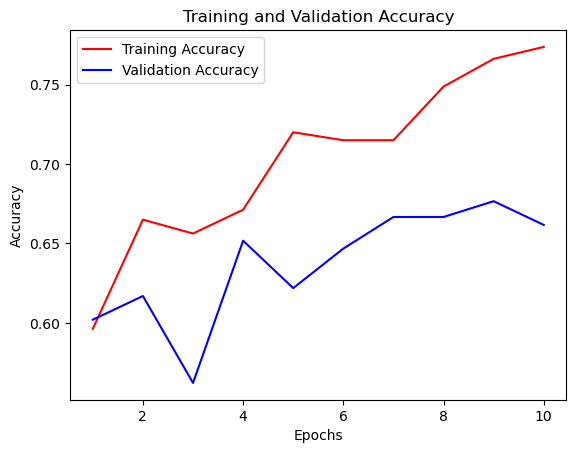

In [42]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
# plt.savefig("output.jpg")
# Saving figure by changing parameter values
# plt.savefig("output1", facecolor='y', bbox_inches="tight",
            # pad_inches=0.3, transparent=True)
plt.show()

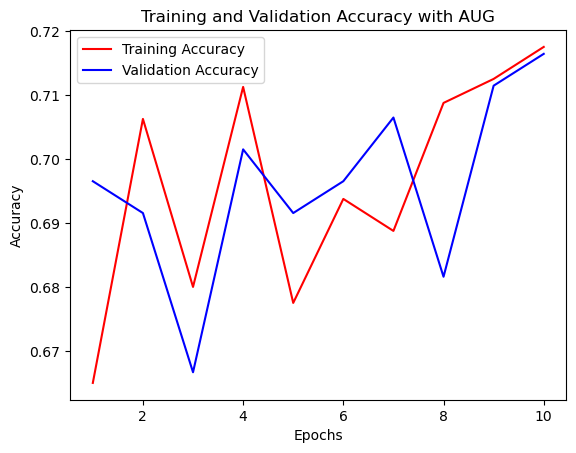

In [48]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, history_aug.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, history_aug.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy with AUG')
plt.legend()
# plt.savefig("output.jpg")
# Saving figure by changing parameter values
# plt.savefig("output1", facecolor='y', bbox_inches="tight",
            # pad_inches=0.3, transparent=True)
plt.show()

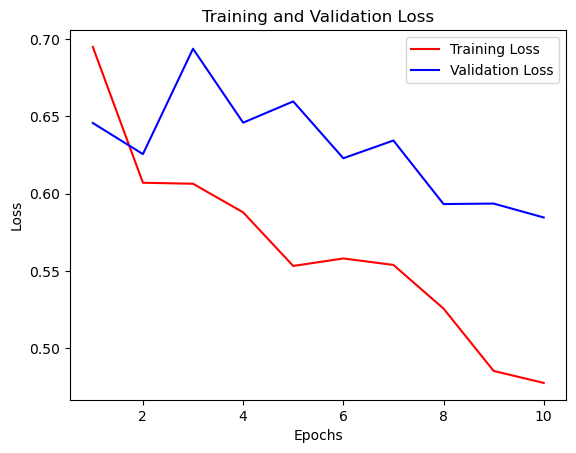

In [46]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# plt.savefig("outputloss2.jpg")
plt.show()

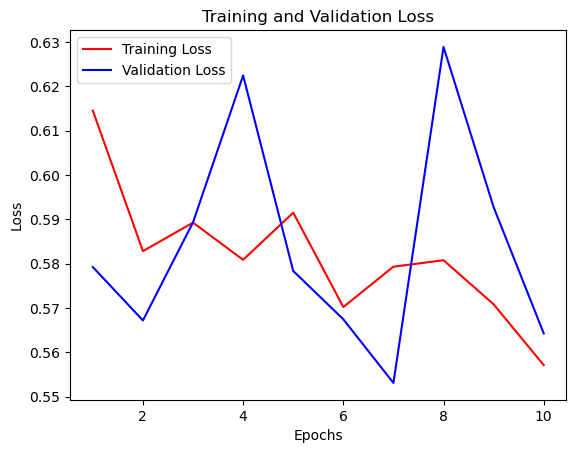

In [47]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, history_aug.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, history_aug.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss with AUG')
plt.legend()
# plt.savefig("outputloss2.jpg")
plt.show()

## Using Model

In [52]:
load_model = tf.keras.models.load_model('model.h5')

In [54]:
load_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 320000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    20,480,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,481,027 (78.13 MB)

 Trainable params: 20,481,025 (78.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [66]:
path = 'data/test/straight/7f6f137e9e49d8b16c3ce0134378cb08.jpg'

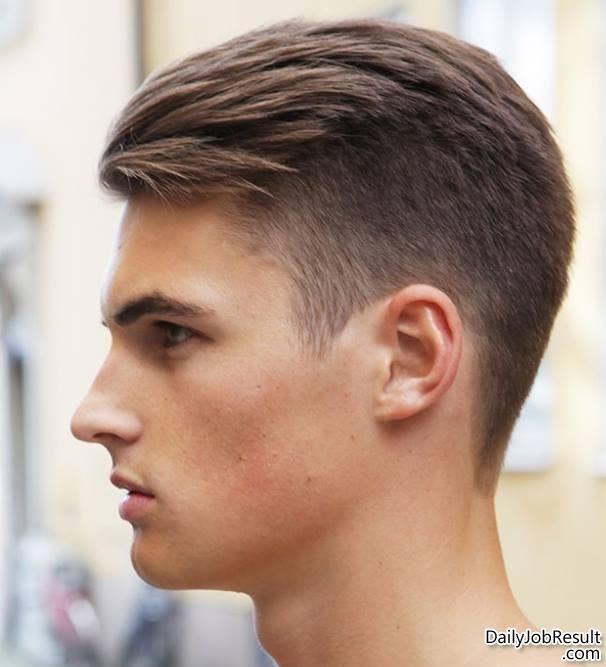

In [67]:
load_img(path)

In [68]:
img = load_img(path, target_size = (200,200))

In [69]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 200, 200, 3)

In [70]:
pred = load_model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [65]:
train_generator.class_indices

{'curly': 0, 'straight': 1}

In [72]:
classes = ['curly', 'straight']

In [75]:
dict(zip(classes, pred[0]))

{'curly': np.float32(1.0)}